<h1> ELABORATO QUANTUM INFORMATION </h1>

<h5>D'amora Agostino M6300...</h5>
<h5>Esposito Marcello M63001768</h5>

__________________________________________________________________________________________________________________________________

<h3>Libs</h3>

In [39]:
%pip install qiskit-aer==0.16.1
%pip install qiskit==1.3.2
%pip install qiskit-ibm-runtime==0.26.0
%pip install qiskit_experiments==0.7.0
%pip install matplotlib==3.8.4
%pip install pylatexenc==2.10
%pip install seaborn==0.13.2
%pip install git+https://github.com/abdullahkhalids/stac

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Cloning https://github.com/abdullahkhalids/stac to c:\users\gaming\appdata\local\temp\pip-req-build-xfku6rsh
  Resolved https://github.com/abdullahkhalids/stac to commit 2428f7c5e31123f4a1768fdbaa18e50ab471c805
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/abdullahkhalids/stac 'C:\Users\Gaming\AppData\Local\Temp\pip-req-build-xfku6rsh'

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit_aer import AerSimulator, QasmSimulator, StatevectorSimulator
from qiskit_experiments.library import ProcessTomography
from qiskit.visualization import plot_bloch_multivector, plot_state_city, array_to_latex
from qiskit.quantum_info import partial_trace, Statevector, DensityMatrix, Operator, StabilizerState, purity
import math

<h3>Basic Examples</h3>

<h5> Init circuit </h5>

In [41]:
qc_1 = QuantumCircuit(1)
qc_1.x(0) # Create |1> state

qc_plus = QuantumCircuit(1)
qc_plus.h(0) # Create |+> state

<h5> Ket rapresentation </h5>

In [42]:
state_vector = Statevector(qc_1)
state_vector.draw('latex')

<IPython.core.display.Latex object>

In [43]:
state_vector = Statevector(qc_plus)
state_vector.draw('latex')

<IPython.core.display.Latex object>

<h5> Density matrix rapresentation </h5>

In [44]:
print("Density Matrix Representation:")

density_matrix = DensityMatrix(qc_1)
density_matrix.draw('latex')

Density Matrix Representation:


<IPython.core.display.Latex object>

In [45]:
density_matrix = DensityMatrix(qc_plus)
density_matrix.draw('latex')

<IPython.core.display.Latex object>

<h5> Stabilizer rapresentation </h5>

In [46]:
stabilizer_state = StabilizerState(qc_1)
print(stabilizer_state)
stabilizer_state = StabilizerState(qc_plus)
print(stabilizer_state)

StabilizerState(['-Z'])
StabilizerState(['+X'])


<h2> State space growht </h2>

In [47]:
# init circutis

qc_phi_plus = QuantumCircuit(2)
qc_phi_plus.h(0)
qc_phi_plus.cx(0,1)

qc_ghz = QuantumCircuit(3)
qc_ghz.h(0)
qc_ghz.cx(0,1)
qc_ghz.cx(0,2)

<h5> Density Matrix </h5> 2^n x 2^n matrix

In [48]:
density_matrix = DensityMatrix(qc_phi_plus)
print(density_matrix.dim)
density_matrix.draw('latex')

4


<IPython.core.display.Latex object>

In [49]:
density_matrix = DensityMatrix(qc_ghz)
print(density_matrix.dim)
density_matrix.draw('latex')

8


<IPython.core.display.Latex object>

<h5> Stabilizer </h5>
n generators

In [50]:
stabilizer_state = StabilizerState(qc_phi_plus)
print(stabilizer_state)

StabilizerState(['+XX', '+ZZ'])


In [51]:
stabilizer_state = StabilizerState(qc_ghz)
print(stabilizer_state)

StabilizerState(['+XXX', '+IZZ', '+ZIZ'])


<h2>Mixed State</h2> purity always != 1

In [52]:
# Directly setup mixed state

mixed_state = (
    1/2 * DensityMatrix(qc_1)
    +
    1/2 * DensityMatrix(qc_plus)
)

print(f"Purity {purity(mixed_state)}")
mixed_state.draw('latex')



Purity (0.75+0j)


<IPython.core.display.Latex object>

In [53]:
# Get mixed state as partial trace of entangled system
qc_mixed = QuantumCircuit(2)
qc_mixed.h(0)
qc_mixed.cx(0, 1)

mixed_state = partial_trace(Statevector.from_instruction(qc_mixed), [0])
print(f"Purity {purity(mixed_state)}")
mixed_state.draw('latex')

Purity (0.4999999999999998+0j)


<IPython.core.display.Latex object>

Non Clifford Circuit

In [54]:
# Circuito quantistico con porta non di Clifford
qc_non_clifford = QuantumCircuit(2)
qc_non_clifford.h(0)
qc_non_clifford.tdg(0)
qc_non_clifford.cx(0, 1)

In [55]:
DensityMatrix(qc_non_clifford).draw('latex')

<IPython.core.display.Latex object>

In [56]:
try:
    StabilizerState(qc_non_clifford)
except Exception as e:
    print(f"Error using stabilizer formalism: {e}")

Error using stabilizer formalism: 'Cannot update Clifford with non-Clifford gate tdg'


---

<h2>Benchmarks</h2>

In [57]:
# benchmarks imports
import time as bm_t
import tracemalloc as bm_m

<h4>Clifford circuits benchmark</h4> only H - S - CNOT

<h5>Testbench circuit & configuration</h5>

In [58]:
shots = 20000 # number of simulations

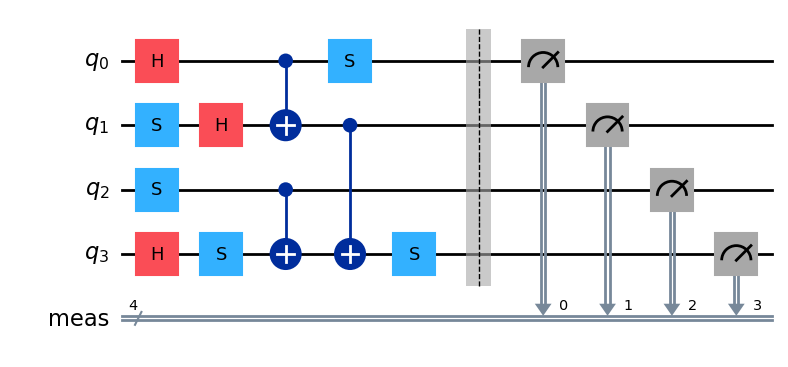

In [59]:
qc = QuantumCircuit(4)

# Layer 1
qc.h(0)
qc.s(1)
qc.s(2)
qc.h(3)

# Layer 2
qc.h(1)
qc.s(3)

# Layer 3
qc.cx(0, 1)
qc.cx(2, 3)

# Layer 4
qc.cx(1, 3)
qc.s(0)

# Layer 5
qc.s(3)

qc.measure_all()

qc.draw('mpl')

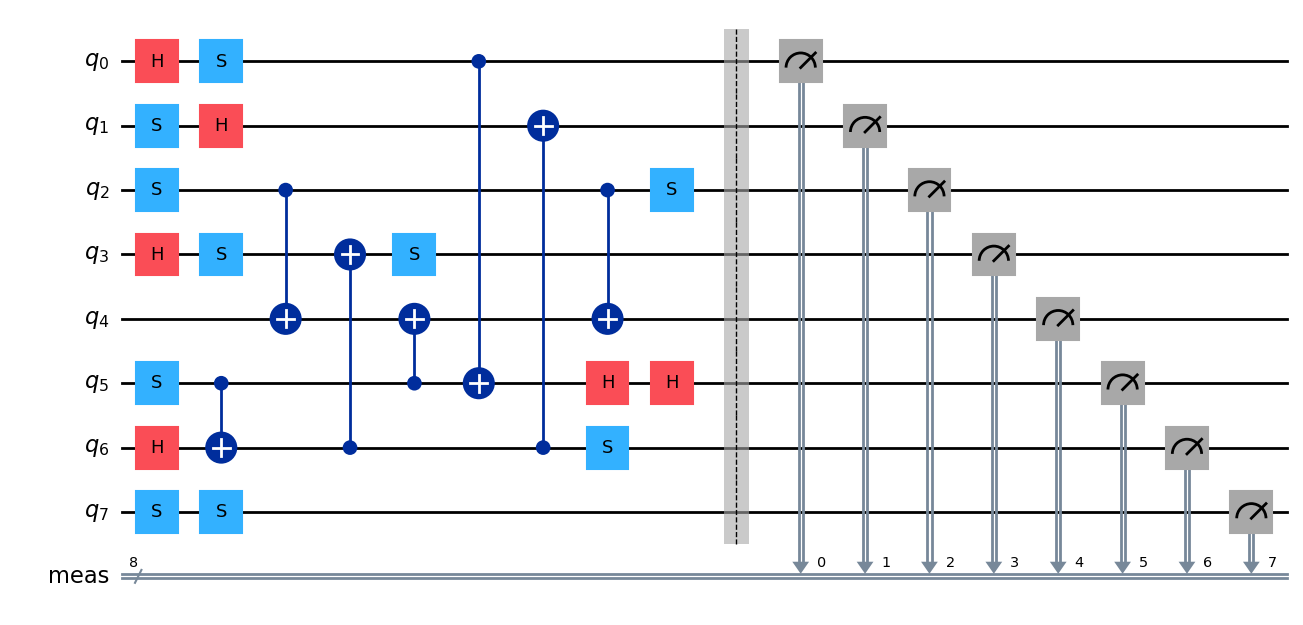

In [60]:
qc_2 = QuantumCircuit(8)

# Layer 1
qc_2.h(0)
qc_2.s(1)
qc_2.s(2)
qc_2.h(3)
qc_2.s(5)
qc_2.h(6)

# Layer 2
qc_2.h(1)
qc_2.s(3)
qc_2.cx(2, 4)
qc_2.cx(5, 6)

# Layer 3
qc_2.cx(6, 3)
qc_2.cx(5, 4)
qc_2.s(0)

# Layer 4
qc_2.cx(0, 5)
qc_2.s(7)

# Layer 5
qc_2.s(3)
qc_2.s(7)
qc_2.h(5)

qc_2.cx(6, 1)
qc_2.cx(2, 4)
qc_2.h(5)
qc_2.s(2)
qc_2.s(6)

qc_2.measure_all()

qc_2.draw('mpl')

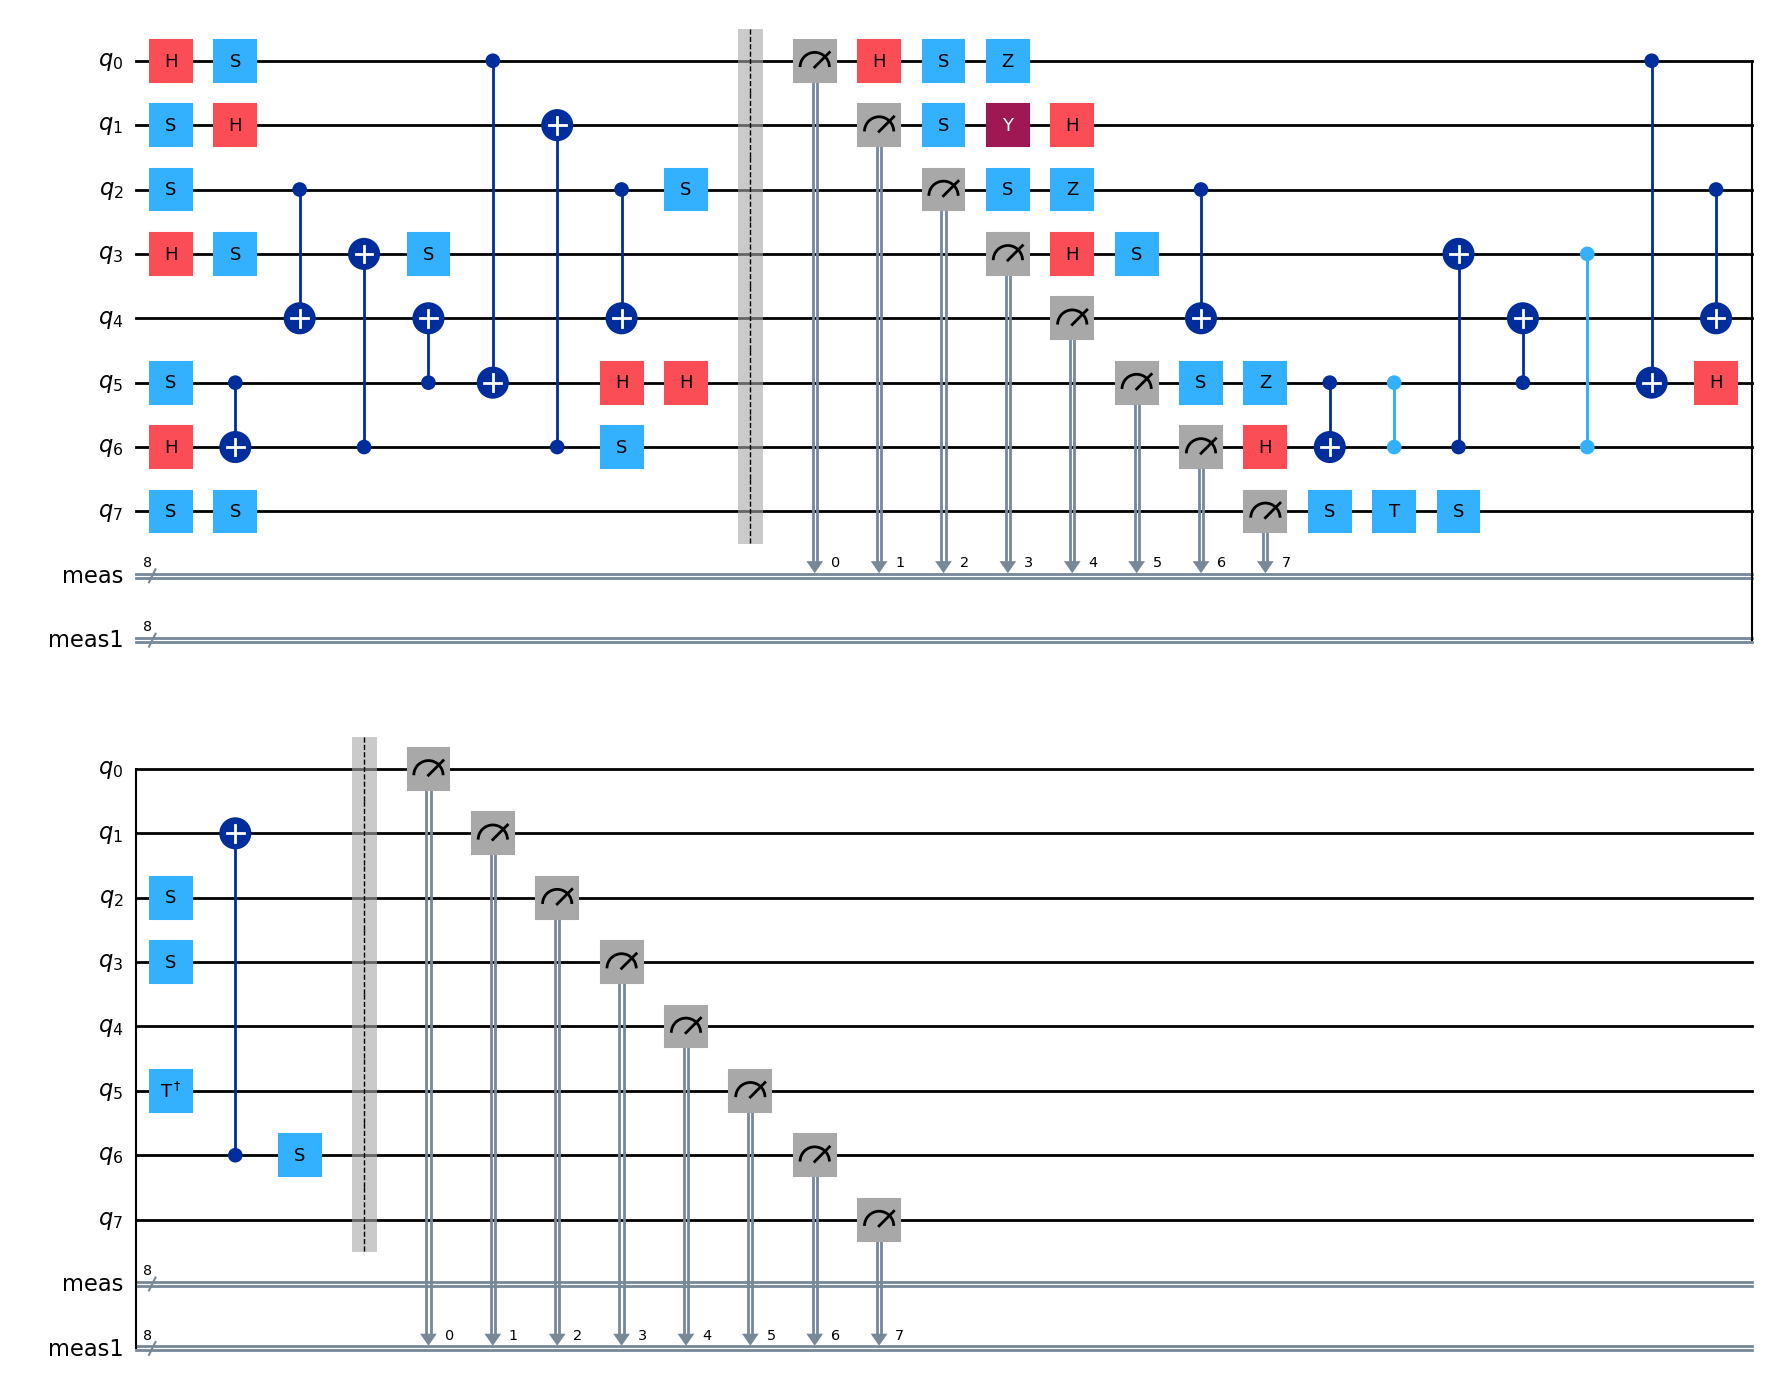

In [61]:
qc_4 = QuantumCircuit(8)

# Layer 1
qc_2.h(0)
qc_2.s(1)
qc_2.y(1)
qc_2.s(2)
qc_2.z(2)
qc_2.h(3)
qc_2.s(5)
qc_2.z(5)
qc_2.h(6)

# Layer 2
qc_2.h(1)
qc_2.s(3)
qc_2.cx(2, 4)
qc_2.cx(5, 6)
qc_2.cz(5, 6)

# Layer 3
qc_2.cx(6, 3)
qc_2.cz(6, 3)
qc_2.cx(5, 4)
qc_2.s(0)
qc_2.z(0)

# Layer 4
qc_2.cx(0, 5)
qc_2.s(7)
qc_2.t(7)

# Layer 5
qc_2.s(3)
qc_2.s(7)
qc_2.h(5)

qc_2.cx(6, 1)
qc_2.cx(2, 4)
qc_2.tdg(5)
qc_2.s(2)
qc_2.s(6)

qc_2.measure_all()

qc_2.draw('mpl')

In [62]:
import random


def random_clifford_circuit(n, depth):
    qc = QuantumCircuit(n)
    for _ in range(depth):
        for q in range(n):
            if random.choice([True, False]):
                qc.h(q)
            else:
                qc.s(q)
        # Add some entangling gates
        for i in range(n - 1):
            qc.cx(i, i + 1)
    return qc

qc_3 = random_clifford_circuit(1000, 2230)
# qc_3.draw('mpl')

In [63]:
# qc_to_benchmark = qc_1
qc_to_benchmark = qc_2
# qc_to_benchmark = qc_3
# qc_to_benchmark = qc_4

#TODO: La simulazione automaticamente sceglie sempre l'approccio migliore

<h5>Density benchmark</h5>

In [64]:
simulator_density = AerSimulator(method="density_matrix") 
# # Start measuring memory usage
# bm_m.start()
# start_time = bm_t.time()
print(simulator_density.available_methods())
# Run the circuit simulation
result = simulator_density.run(qc_to_benchmark, shots=shots, method="density_matrix").result()

# elapsed_time = bm_t.time() - start_time
# current, peak = bm_m.get_traced_memory()
# bm_m.stop()

# print(elapsed_time, peak / 1024)  # peak in KB



('automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop')


<h5>Stabilizer benchmark</h5>

In [65]:
simulator_stabilizer = AerSimulator(method="stabilizer") 

# Start measuring memory usage
# bm_m.start()
# start_time = bm_t.time()

# Run the circuit simulation
result = simulator_stabilizer.run(qc_to_benchmark, shots=shots, method="stabilizer").result()

# elapsed_time = bm_t.time() - start_time
# current, peak = bm_m.get_traced_memory()
# bm_m.stop()

# print(elapsed_time, peak / 1024)  # peak in KB

---

<h2>Process Tomography</h2>

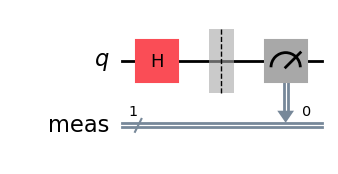

In [66]:
qc_tomo_overhead = QuantumCircuit(1)

# Layer 1
qc_tomo_overhead.h(0)
# qc_tomo.s(1)

qc_tomo_overhead.measure_all()

qc_tomo_overhead.draw('mpl')

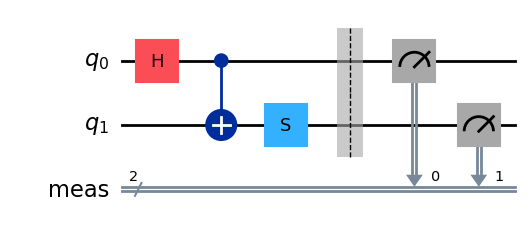

In [67]:
# Crea un circuito quantistico con 2 qubit
qc_tomo = QuantumCircuit(2)

# Layer 1: Crea entanglement
qc_tomo.h(0)
qc_tomo.cx(0, 1)

# Layer 2: Aggiungi una porta singola
qc_tomo.s(1)

# Misura tutti i qubit
qc_tomo.measure_all()

qc_tomo.draw('mpl')

In [68]:
# qc_to_ps_tomo = qc_tomo_overhead
qc_to_ps_tomo = qc_tomo

<h5>Density matrix</h5>

In [69]:
simulator_density = AerSimulator(method="density_matrix") 

circuit_tomo_density = ProcessTomography(qc_to_ps_tomo, simulator_density)

res = circuit_tomo_density.run(simulator_density, shots=10)
print(res.data())

[{'counts': {'00 00': 4, '11 11': 6}, 'job_id': 'b5fca0b4-d612-4d8e-8f76-7863a144f8db', 'metadata': {'clbits': [2, 3], 'cond_clbits': None, 'm_idx': [0, 0], 'p_idx': [0, 0]}, 'shots': 10, 'meas_level': <MeasLevel.CLASSIFIED: 2>}, {'counts': {'01 11': 1, '10 00': 4, '00 00': 4, '11 11': 1}, 'job_id': 'b5fca0b4-d612-4d8e-8f76-7863a144f8db', 'metadata': {'clbits': [2, 3], 'cond_clbits': None, 'm_idx': [0, 1], 'p_idx': [0, 0]}, 'shots': 10, 'meas_level': <MeasLevel.CLASSIFIED: 2>}, {'counts': {'10 00': 2, '00 00': 4, '11 11': 3, '01 11': 1}, 'job_id': 'b5fca0b4-d612-4d8e-8f76-7863a144f8db', 'metadata': {'clbits': [2, 3], 'cond_clbits': None, 'm_idx': [0, 2], 'p_idx': [0, 0]}, 'shots': 10, 'meas_level': <MeasLevel.CLASSIFIED: 2>}, {'counts': {'11 11': 4, '10 11': 3, '01 00': 1, '00 00': 2}, 'job_id': 'b5fca0b4-d612-4d8e-8f76-7863a144f8db', 'metadata': {'clbits': [2, 3], 'cond_clbits': None, 'm_idx': [1, 0], 'p_idx': [0, 0]}, 'shots': 10, 'meas_level': <MeasLevel.CLASSIFIED: 2>}, {'counts': 

<h5>Stabilizer</h5>

In [70]:
simulator_stabilizer = AerSimulator(method="stabilizer") 

circuit_tomo_stabilizer = ProcessTomography(qc_to_ps_tomo, simulator_stabilizer)

res = circuit_tomo_stabilizer.run(simulator_stabilizer, shots=10)
print(res.data())

Provider for ExperimentData object doesn't exist, resulting in a failed attempt to retrieve data from the server; no stored result data exists


[]


---

<h2>Quantum Error Correction</h2>

<h5>Setup 1 + 2 qubit channel</h5>

In [ ]:
q_number = 3

q_logical = QuantumRegister(1, 'Message')
q_ancillas_sender = QuantumRegister(q_number - 1, 'Alice\'s ancilla')
q_ancillas_receiver = QuantumRegister(q_number - 1, 'Bob\'s ancilla')
c_measure_result = ClassicalRegister(q_number - 1, 'Error Syndrome')

qc_qec = QuantumCircuit(q_logical, q_ancillas_sender, q_ancillas_receiver, c_measure_result)

# set logical qubit to |1>
qc_qec.x(0)

# distribute state
for q in range(1,q_number):
    qc_qec.cx(0, q)

qc_qec.barrier(range(q_number), label="|111>")

# ERROR PHASE

# simulate error X, Y or Z on a single qubit
errors = [qc_qec.x, qc_qec.y, qc_qec.z]

# random version
# for q in range(q_number):
#     if random.getrandbits(1):
#             random.choice(errors)(q)
#             break

# test version
qc_qec.x(1)



# ERROR SYNDROME PHASE

for q in range(3, 5):
    qc_qec.h(q)

# XZZXI
qc_qec.cz(0, 3)  
qc_qec.cz(0, 4) 

qc_qec.barrier(range((q_number * 2) - 1))  
qc_qec.cz(1, 3)  
qc_qec.cz(1, 4) 

qc_qec.barrier(range((q_number * 2) - 1))  

# Final Hadamard and measurement gates to extract the syndrome
for q in range(3, 5):
    qc_qec.h(q)  # Apply Hadamard to ancilla qubits to complete the syndrome extraction
    qc_qec.measure(q, q - 3)  # Measure ancilla qubits and store results in classical bits


# setup receiver circuit
qc_qec.draw('mpl', plot_barriers=True)

# Simulate the circuit using AerSimulator
simulator = AerSimulator()
job = simulator.run(qc_qec, shots=9)
result = job.result()

# Get the counts from the simulation
counts = result.get_counts(qc_qec)

# Print the counts (which are the classical register values)
print(counts)

{'11': 9}


In [143]:
# 5 qubit quantum error correction

# INIT PHASE
q_number = 5

q_logical = QuantumRegister(1, 'Logical qubit')

q_ancillas_sender = QuantumRegister(q_number - 1, 'Alice\'s ancilla')
q_ancillas_receiver = QuantumRegister(q_number - 1, 'Bob\'s ancilla')
c_measure_result = ClassicalRegister(q_number - 1, 'Error Syndrome')

qc_qec = QuantumCircuit(q_logical, q_ancillas_sender, q_ancillas_receiver, c_measure_result)

# Set logical qubit in super position (Comment out if you want only |0>)
# rand_amplitude = random.random()
# a = math.sqrt(rand_amplitude)
# b = math.sqrt((1 - rand_amplitude))
# qc_qec.initialize([a, b], 0)


qc_qec.barrier(range(q_number), label="a|0>+b|1>")

# ENCODING LOGICAL QUBIT PHASE

qc_qec.h(0)               
qc_qec.cz(0, 1)          
qc_qec.cz(0, 3)          
qc_qec.cx(0, 4)          
qc_qec.cz(0, 4)          

qc_qec.barrier(range(q_number))
qc_qec.h(1)               
qc_qec.cz(1, 2)          
qc_qec.cz(1, 3)          
qc_qec.cx(1, 4)              

qc_qec.barrier(range(q_number))
qc_qec.h(2)               
qc_qec.cz(2, 0)          
qc_qec.cz(2, 1)          
qc_qec.cx(2, 4)                  

qc_qec.barrier(range(q_number))
qc_qec.h(3)               
qc_qec.cz(3, 0)          
qc_qec.cz(3, 2)          
qc_qec.cx(3, 4)      
qc_qec.cz(3, 4)  

qc_qec.barrier(range(q_number), label="|ψ⟩L")


# NOISE PHASE

# Simulate error X, Y or Z on a single qubit
errors = [qc_qec.x, qc_qec.y, qc_qec.z]
# random version
# for q in range(q_number):
#     if random.getrandbits(1):
#             random.choice(errors)(q)
#             break

# Manually set error
qc_qec.y(0)


qc_qec.barrier(range((q_number * 2) - 1), label="Channel")


# ERROR SYNDROME PHASE

for q in range(5, 9):
    qc_qec.h(q)

# XZZXI
qc_qec.cx(5, 0)
qc_qec.cz(5, 1)
qc_qec.cz(5, 2)
qc_qec.cx(5, 3)

qc_qec.barrier(range((q_number * 2) - 1)) 

# IXZZX
qc_qec.cx(6, 1)
qc_qec.cz(6, 2)
qc_qec.cz(6, 3)
qc_qec.cx(6, 4)

qc_qec.barrier(range((q_number * 2) - 1))

# XIXZZ
qc_qec.cx(7, 0)
qc_qec.cx(7, 2)
qc_qec.cz(7, 3)
qc_qec.cz(7, 4)

qc_qec.barrier(range((q_number * 2) - 1))

# ZXIXZ
qc_qec.cz(8, 0)
qc_qec.cx(8, 1)
qc_qec.cx(8, 3)
qc_qec.cz(8, 4)

qc_qec.barrier(range((q_number * 2) - 1))

for q in range(5, 9):
    qc_qec.h(q) 

qc_qec.measure(5, 3)
qc_qec.measure(6, 2)
qc_qec.measure(7, 1)
qc_qec.measure(8, 0)


qc_qec.draw('mpl', plot_barriers=True)

# simulate circuit (comment everything below to draw it instead)
simulator = AerSimulator()
job = simulator.run(qc_qec, shots=10)
result = job.result()

counts = result.get_counts(qc_qec)

error_syndrome_lut = {
    "0001": "X1",
    "1010": "Z1",
    "1011": "Y1",
    "1000": "X2",
    "0101": "Z2",
    "1101": "Y2",
    "1100": "X3",
    "0010": "Z3",
    "1110": "Y3",
    "0110": "X4",
    "1001": "Z4",
    "1111": "Y4",
    "0011": "X5",
    "0100": "Z5",
    "0111": "Y5"
}
print(counts)

print(f"Error found: {error_syndrome_lut[list(counts)[0]]}")

{'1011': 10}
Error found: Y1
